##  Introdução
Este notebook realiza uma análise exploratória de dados em um conjunto de informações sobre saúde e fatores relacionados ao diabetes.
O objetivo é identificar padrões e variáveis que possam estar associadas à ocorrência da doença.


### Importação de bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Carregamento e inspeção dos dados

In [46]:
file = 'Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file)
print(df.head()) #primeiras linhas do dataframe

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

### Tratamento de dados

In [62]:
#Buscando colunas com valores faltantes
#print(df.isnull().sum())
#Cuidadando especificamente de Sleep Disorder
print(df['Sleep Disorder'].value_counts(dropna=False))
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')
print(df['Sleep Disorder'].value_counts())

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64
Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


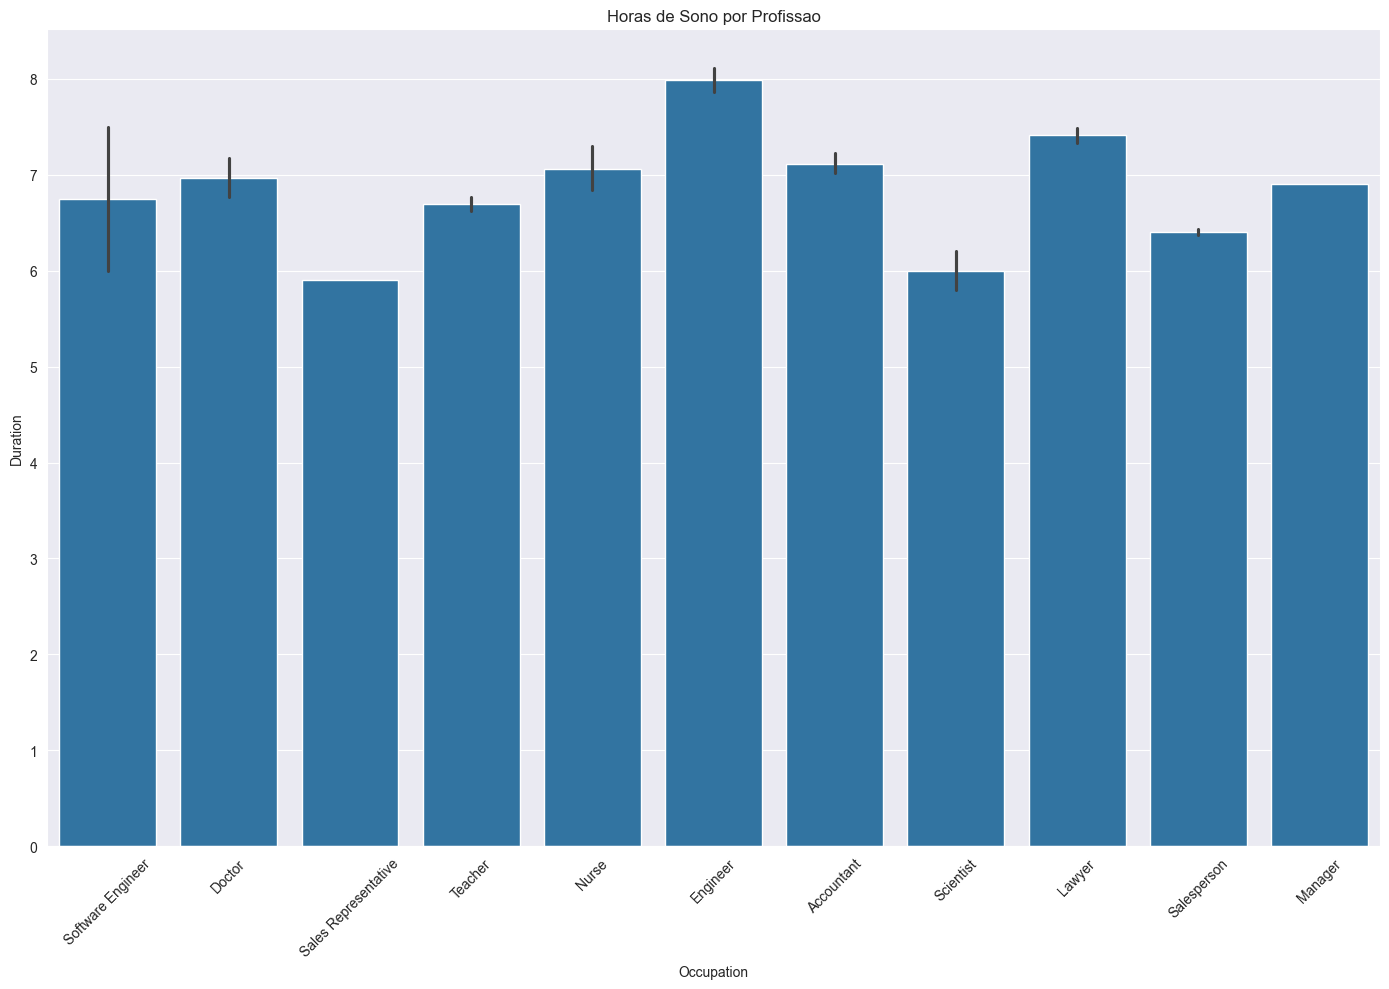

In [33]:
#Avaliando a duracao de sono por profissao
plt.figure(figsize=(14, 10))
plt.title('Horas de Sono por Profissao')
sns.barplot(x=df['Occupation'], y=df['Sleep Duration'])
plt.ylabel('Duration')
plt.xticks(rotation=45) #rotaciona os rotulos do eixo x
plt.tight_layout() #ajusta o layout automaticamente
plt.show()

#### Insights:
- O gráfico mostra que cientistas e representantes de vendas apresentam as menores médias de horas de sono. Isso pode estar ligado à alta demanda cognitiva (cientistas) e pressão por metas/vendas (representantes comerciais). Já profissões mais estáveis ou com rotinas fixas tendem a ter maior regularidade no sono.

C:\Users\Philipe\AppData\Local\Temp\ipykernel_12400\2560864512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['BMI Category'], y=df['Quality of Sleep'], palette='coolwarm')


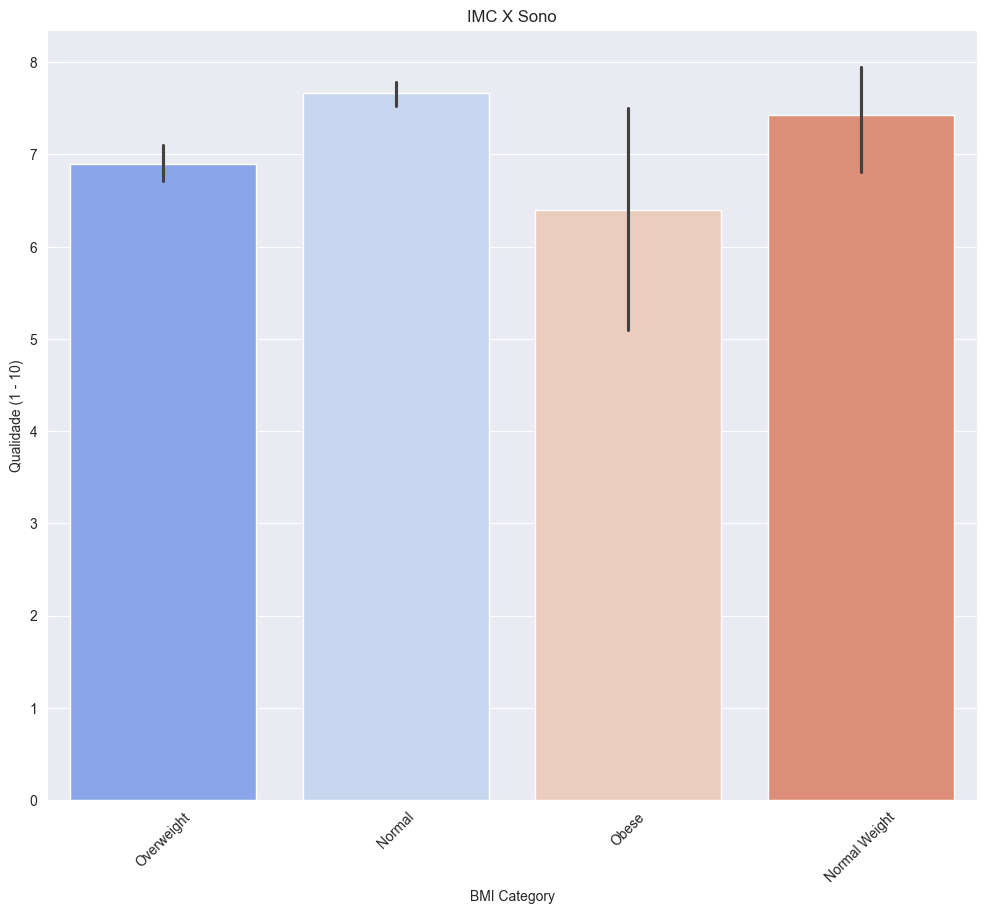

In [40]:
#Avaliando a relacao do IMC com o sono
plt.figure(figsize=(12, 10))
plt.title('IMC X Sono')
sns.barplot(x=df['BMI Category'], y=df['Quality of Sleep'], palette='coolwarm')
plt.xticks(rotation=45)
plt.ylabel('Qualidade (1 - 10)')
plt.show()

#### Insigth:
- Indivíduos com peso normal reportam qualidade de sono mais alta (média entre 7–8/10). Já pessoas obesas apresentam queda significativa (5–6/10), reforçando a associação entre excesso de peso, apneia do sono e má qualidade de descanso. Esse resultado está em linha com estudos clínicos que apontam a obesidade como fator de risco para distúrbios do sono.

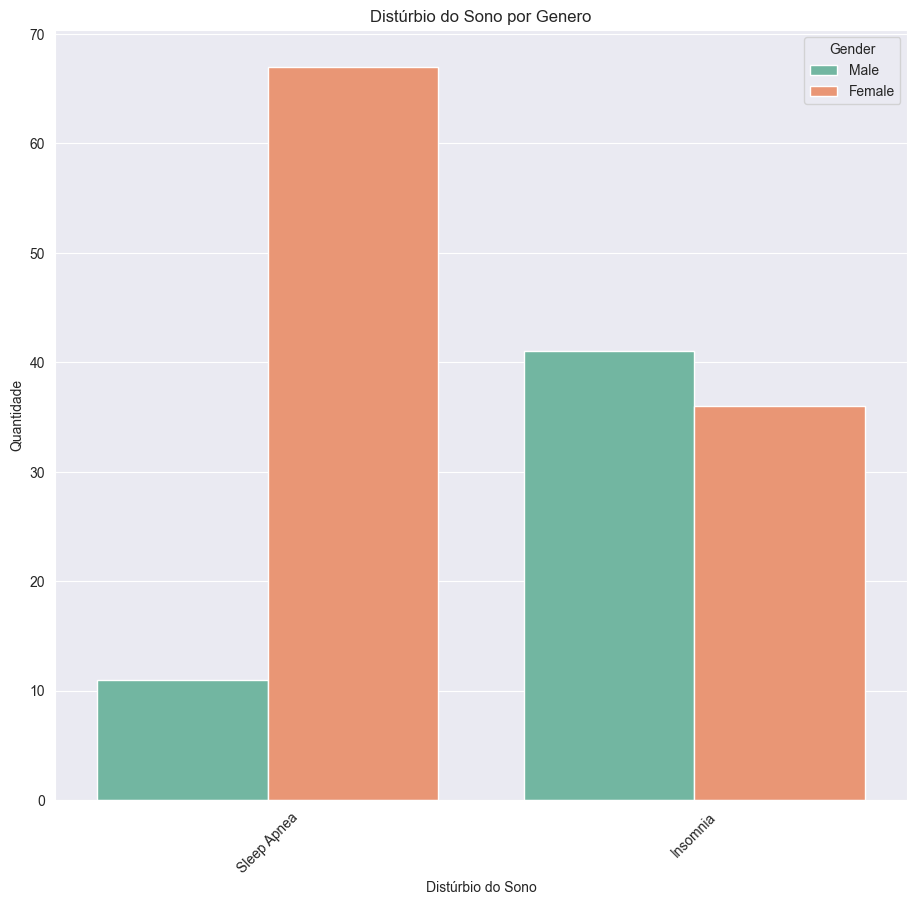

In [43]:
#Analisando o disturbio de sono por genero
plt.figure(figsize=(11, 10))
plt.title('Distúrbio do Sono por Genero')
sns.countplot(x=df['Sleep Disorder'], hue=df['Gender'], palette="Set2")
plt.xlabel('Distúrbio do Sono')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

#### Insight:
- Mulheres apresentam maior prevalência de insônia, possivelmente devido a fatores hormonais, estresse e sobrecarga de responsabilidade.
- Homens, por outro lado, têm maior incidência de apneia do sono, condição associada ao sobrepeso e características anatômicas das vias aéreas. Essa diferença reforça a importância de políticas de saúde específicas por gênero no tratamento dos distúrbios.

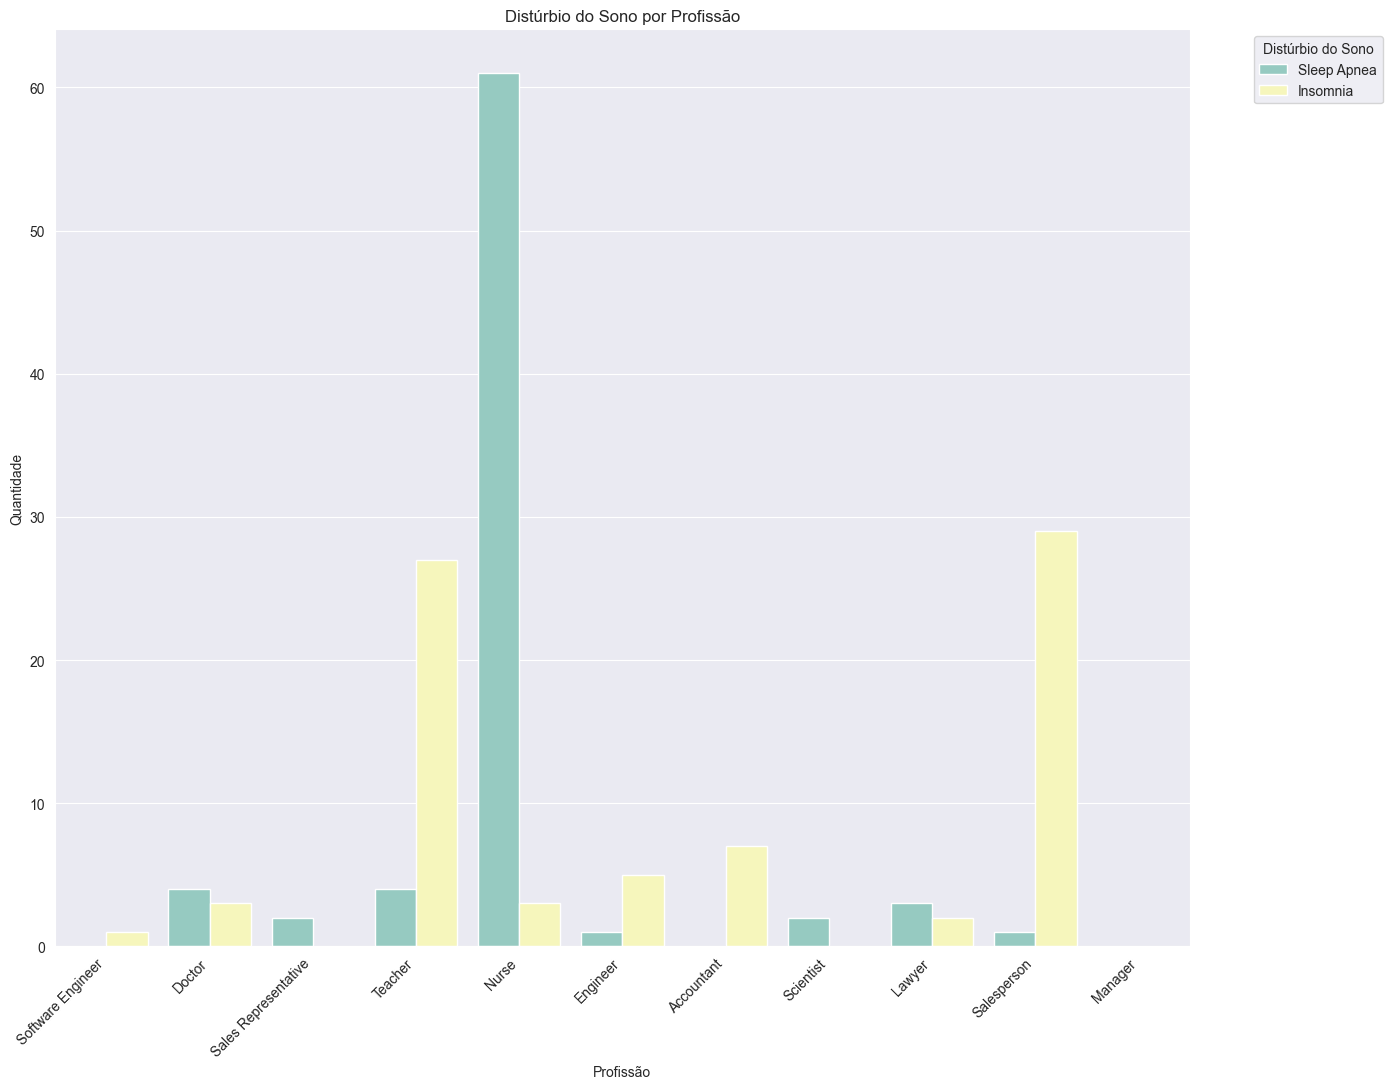

In [ ]:
#Distribuicao do Sono
plt.figure(figsize=(14, 11))
plt.title('Distúrbio do Sono por Profissão')
sns.countplot(x=df['Occupation'], hue=df['Sleep Disorder'], palette='Set3') 
plt.xlabel('Profissão')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')  # Rotação e alinhamento para melhor legibilidade
plt.legend(title='Distúrbio do Sono', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mova a legenda para fora se lotado
plt.tight_layout()
plt.show()

#### Insights:
- Profissões com alta carga de estresse ou horários irregulares (como cientistas, profissionais de saúde e representantes de vendas) mostram maior incidência de insônia e apneia do sono. Isso indica que a rotina profissional exerce papel crucial na qualidade do sono, impactando diretamente saúde mental e física.